In [84]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sb

In [85]:
titanic =pd.read_csv("titanic_train.csv")

In [86]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


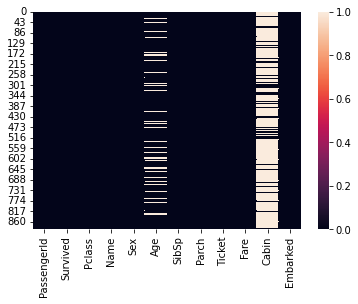

In [87]:
sb.heatmap(titanic.isnull())

In [88]:
titanic.drop('Cabin',inplace=True,axis=1)

In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [90]:
titanic.drop(['PassengerId','Name','Ticket','Fare'],inplace=True,axis=1)

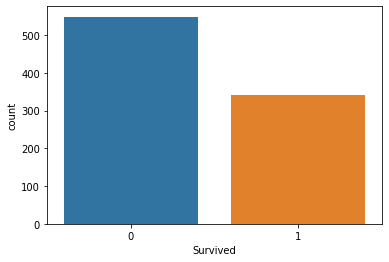

In [91]:
sb.countplot(data=titanic,x="Survived")

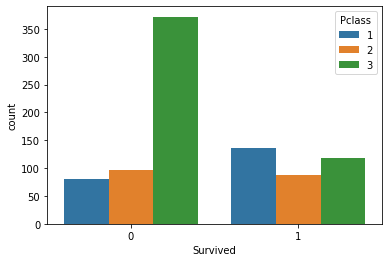

In [92]:
sb.countplot(data=titanic,x="Survived",hue="Pclass")

In [93]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)

In [94]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [95]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [96]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [97]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [98]:
titanic=pd.concat([titanic,gender,embark],axis=1)

In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


In [100]:
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

In [101]:
titanic[titanic['Pclass']==2]['Age'].mean()

29.87763005780347

In [102]:
titanic[titanic['Pclass']==3]['Age'].mean()

25.14061971830986

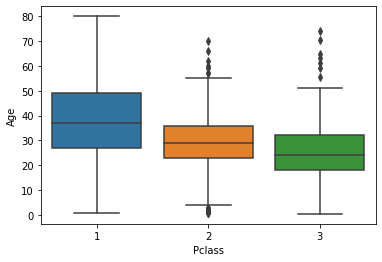

In [103]:
sb.boxplot(data=titanic,x='Pclass',y='Age')

In [106]:
def clean(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 30
    else:
      return 25
  else:
    return Age

In [107]:
titanic['Age']=titanic[['Age','Pclass']].apply(clean,axis=1)

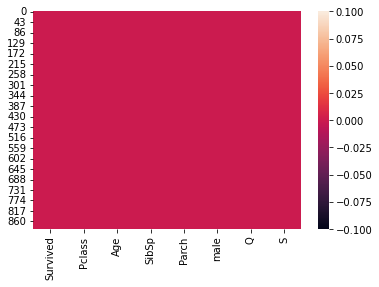

In [108]:
sb.heatmap(titanic.isnull())

In [110]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


In [112]:
x=titanic[['Pclass','Age','SibSp','Parch','male','Q','S']]#orx=titanic.iloc[:,1:]
y=titanic['Survived']

In [113]:
len(x)

891

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [122]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [123]:
vnr = LogisticRegression()#y=e^-(mx+c)
vnr.fit(xtrain,ytrain)

LogisticRegression()

In [125]:
vnr.coef_

array([[-1.08474584, -0.04383342, -0.28770272, -0.1752765 , -2.4664911 ,
        -0.33732057, -0.56855225]])

In [126]:
vnr.intercept_

array([5.40013294])

In [127]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [144]:
vnr.predict([[3,30,0,1,1,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [128]:
pr=vnr.predict(xtest)

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [140]:
confusion_matrix(ytest,pr)

array([[168,  15],
       [ 33,  79]])

In [141]:
233/295 #alivepercent

0.7898305084745763

In [142]:
62/295 #deathpercent

0.21016949152542372

In [143]:
print(classification_report(ytest,pr))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       183
           1       0.84      0.71      0.77       112

    accuracy                           0.84       295
   macro avg       0.84      0.81      0.82       295
weighted avg       0.84      0.84      0.83       295

